In [10]:
#Imports necesarios

import numpy as np
from torch import nn
import torch
import time
import pickle as pk
from torch.utils.data import DataLoader
import os
from torch.utils.data import Dataset
import matplotlib.pyplot as plt

In [11]:
class StampDataset(Dataset):
    def __init__(self, images,features,onehot):
        self.img = images
        self.features = features
        self.labels = onehot

    def __len__(self):
        return len(self.img)

    def __getitem__(self, idx):
        return self.img[idx,:,:,:], self.features[idx,:],self.labels[idx]
    
save_dir = 'C:/Users/nfier/Documents/Magister/cursos/EL7006 Redes Neuronales y Teoría de Información para el Aprendizaje/proyecto/'
#Carga de datos
with open(save_dir + "stamp_dataset_21_new.pkl", "rb") as f:
    data = pk.load(f)


print(data.keys())
#Separacion de los datos
Train_dict = data['Train']
Validation_dict = data['Validation']
train_images = Train_dict['images']
validation_images = Validation_dict['images']
labels_train = Train_dict['class']
labels_val = Validation_dict['class']
features_train = Train_dict['features']
features_val = Validation_dict['features']


#Carga del dataset
train_dataset = StampDataset(np.transpose(train_images,[0,3,1,2]),features_train,labels_train)
val_dataset = StampDataset(np.transpose(validation_images,[0,3,1,2]),features_val,labels_val)

#analize the dataset
print('Train dataset')
print('size: ',len(train_dataset))
print('image shape: ',train_dataset[0][0].shape)
print('feature shape: ',len(train_dataset[0][1]))
print('label example: ',train_dataset[0][2])
print('\nValidation dataset')
print('Example')
print('size: ',len(val_dataset))
print('image shape: ',val_dataset[0][0].shape)
print('feature shape: ',len(val_dataset[0][1]))
print('label example: ',val_dataset[0][2])

dict_keys(['Train', 'Test', 'Validation'])
Train dataset
size:  72710
image shape:  (3, 21, 21)
feature shape:  26
label example:  0.0

Validation dataset
Example
size:  500
image shape:  (3, 21, 21)
feature shape:  26
label example:  1


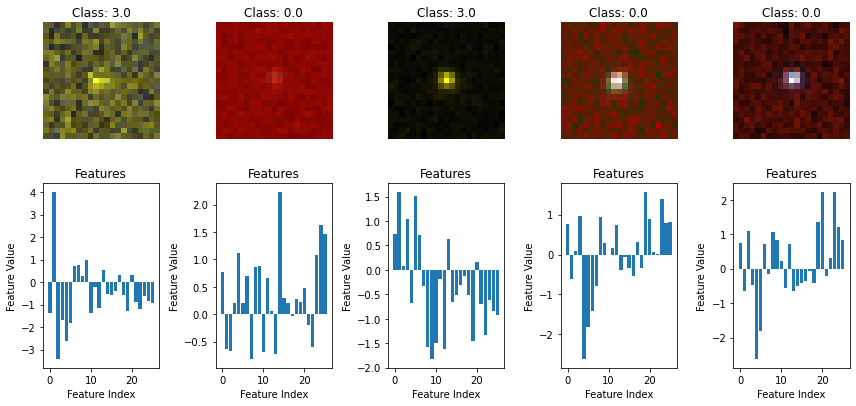

In [12]:
# Visualize some samples from the training dataset
num_samples_to_visualize = 5
num_train_samples = len(train_dataset)
num_val_samples = len(val_dataset)
num_features = len(train_dataset[0][1])
#num_classes = len(train_dataset[0][2])

random_sample_indices = np.random.choice(num_train_samples, num_samples_to_visualize, replace=False)

plt.figure(figsize=(12, 6))
for i, idx in enumerate(random_sample_indices):
    image, features, label = train_dataset[idx]
    plt.subplot(2, num_samples_to_visualize, i + 1)
    plt.imshow(image.transpose(1, 2, 0))  # Assuming channels are the last dimension
    plt.title(f'Class: {label}')
    plt.axis('off')

    plt.subplot(2, num_samples_to_visualize, num_samples_to_visualize + i + 1)
    plt.bar(range(num_features), features)
    plt.title('Features')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Value')

plt.tight_layout()
plt.show()

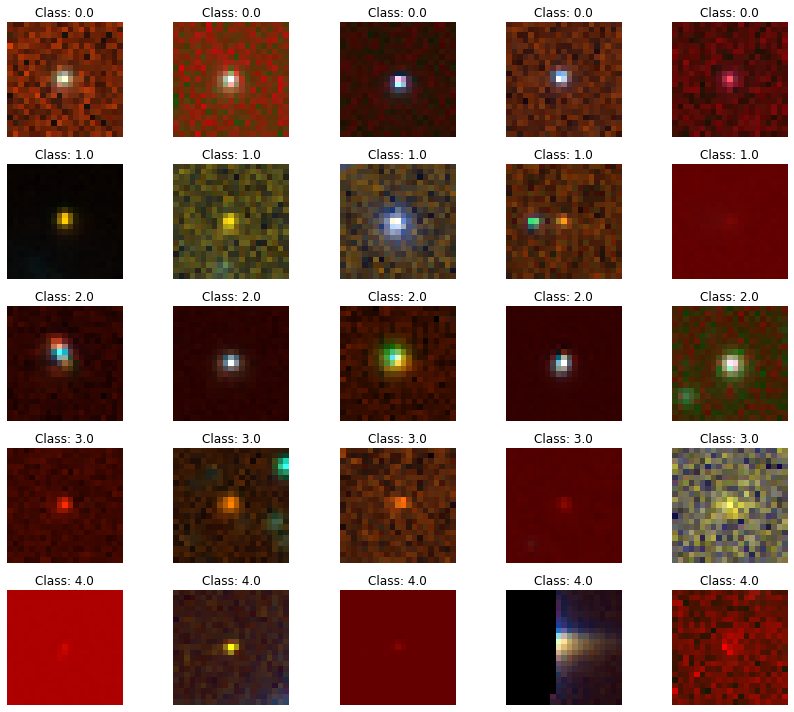

In [13]:
np.random.seed(1234)

# Get unique class labels
unique_classes = np.unique(labels_train)

# Number of samples to visualize for each class
num_samples_per_class = 5

plt.figure(figsize=(12, 2 * len(unique_classes)))



for class_label in unique_classes:
    # Filter samples with the current class label
    class_indices = [idx for idx, label in enumerate(labels_train) if label == class_label]
    
    # Randomly select samples for the current class
    random_sample_indices = np.random.choice(class_indices, num_samples_per_class, replace=False)
    
    for i, idx in enumerate(random_sample_indices):
        image, features, label = train_dataset[idx]
        plt.subplot(len(unique_classes), num_samples_per_class, (int(class_label) * num_samples_per_class) + i + 1)
        plt.imshow(image.transpose(1, 2, 0))  # Assuming channels are the last dimension
        plt.title(f'Class: {label}')
        plt.axis('off')

        if i == 0:
            plt.ylabel(f'Class {class_label}')
        
        if i == num_samples_per_class - 1:
            plt.xlabel('Samples')

plt.tight_layout()
plt.show()


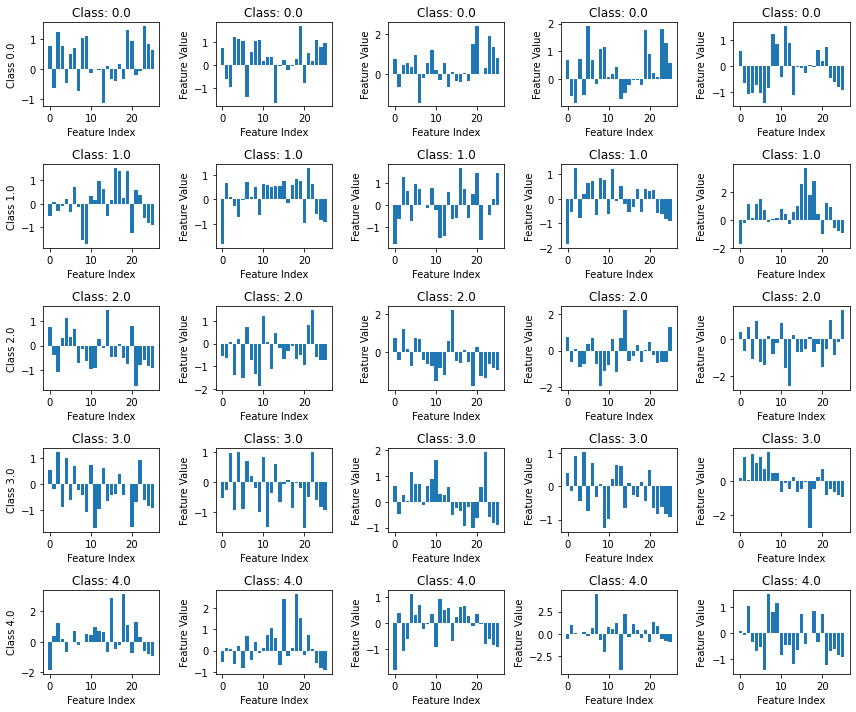

In [14]:
np.random.seed(1234)

# Get unique class labels
unique_classes = np.unique(labels_train)

# Number of samples to visualize for each class
num_samples_per_class = 5

plt.figure(figsize=(12, 2 * len(unique_classes)))

for class_label in unique_classes:
    # Filter samples with the current class label
    class_indices = [idx for idx, label in enumerate(labels_train) if label == class_label]
    
    # Randomly select samples for the current class
    random_sample_indices = np.random.choice(class_indices, num_samples_per_class, replace=False)
    
    for i, idx in enumerate(random_sample_indices):
        _, features, label = train_dataset[idx]
        plt.subplot(len(unique_classes), num_samples_per_class, (int(class_label) * num_samples_per_class) + i + 1)
        plt.bar(range(len(features)), features)
        plt.title(f'Class: {label}')
        plt.xlabel('Feature Index')
        plt.ylabel('Feature Value')

        if i == 0:
            plt.ylabel(f'Class {class_label}')

plt.tight_layout()
plt.show()


In [15]:
from collections import Counter
import numpy as np

class_counter = Counter(labels_train)
print('Class distribution in the training dataset:', class_counter)

# Calculate statistics for features
all_features = np.array([sample[1] for sample in train_dataset])
feature_means = np.mean(all_features, axis=0)
feature_stddevs = np.std(all_features, axis=0)
feature_min = np.min(all_features, axis=0)
feature_max = np.max(all_features, axis=0)

print('Feature statistics:')
for i in range(num_features):
    print(f'Feature {i+1}:')
    print('Mean:', feature_means[i])
    print('Standard Deviation:', feature_stddevs[i])
    print('Min:', feature_min[i])
    print('Max:', feature_max[i])
    print()

Class distribution in the training dataset: Counter({0.0: 14542, 1.0: 14542, 2.0: 14542, 3.0: 14542, 4.0: 14542})
Feature statistics:
Feature 1:
Mean: -0.28793047328463567
Standard Deviation: 1.083920773584966
Min: -4.485488362464686
Max: 0.7787814921200391

Feature 2:
Mean: 0.11148955368045095
Standard Deviation: 1.0084967235323252
Min: -0.8304833744927094
Max: 4.37767137036762

Feature 3:
Mean: -0.03323747717445987
Standard Deviation: 0.9959798040421274
Min: -3.4313997381134587
Max: 1.2620068528107233

Feature 4:
Mean: -0.0002707517325366192
Standard Deviation: 0.9985102828858726
Min: -1.6611834168651327
Max: 2.6682981852217624

Feature 5:
Mean: -0.012030516547972226
Standard Deviation: 0.9990069393229694
Min: -2.6342466212157456
Max: 1.1523122836441402

Feature 6:
Mean: -0.0007903988681140276
Standard Deviation: 0.9951199490845254
Min: -1.8234948848874344
Max: 2.030659053608787

Feature 7:
Mean: 0.18402833595988735
Standard Deviation: 0.9139660918794347
Min: -1.4166488952721947
Max:

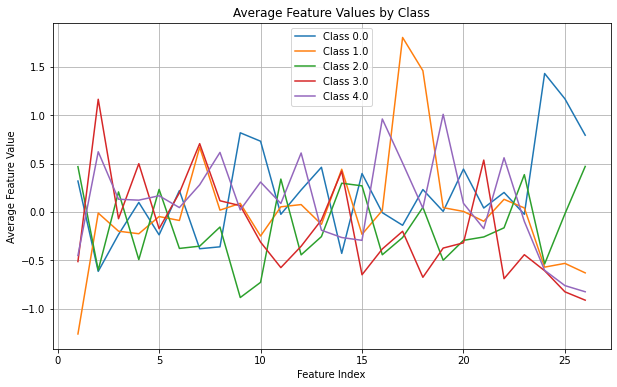

In [16]:
# Get unique class labels
unique_classes = np.unique(labels_train)

# Calculate the average feature values for each class
class_avg_features = {class_label: [] for class_label in unique_classes}
for idx, label in enumerate(labels_train):
    class_avg_features[label].append(features_train[idx])

for class_label in unique_classes:
    class_avg_features[class_label] = np.mean(class_avg_features[class_label], axis=0)

# Number of features
num_features = len(class_avg_features[unique_classes[0]])

# Create a figure for average feature values
plt.figure(figsize=(10, 6))

for class_label in unique_classes:
    plt.plot(range(1, num_features + 1), class_avg_features[class_label], label=f'Class {class_label}')

plt.xlabel('Feature Index')
plt.ylabel('Average Feature Value')
plt.title('Average Feature Values by Class')
plt.legend()
plt.grid(True)
plt.show()


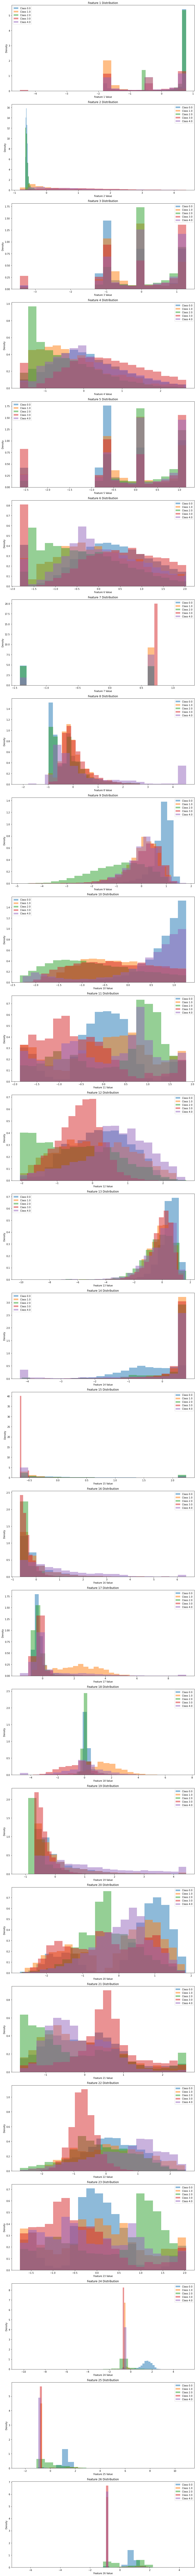

In [17]:
# Get unique class labels
unique_classes = np.unique(labels_train)

# Number of bins for histograms
num_bins = 20

# Create subplots for each feature's distribution
plt.figure(figsize=(12, 6 * num_features))

for feature_idx in range(num_features):
    plt.subplot(num_features, 1, feature_idx + 1)
    
    for class_label in unique_classes:
        # Filter samples with the current class label and feature index
        class_indices = [idx for idx, label in enumerate(labels_train) if label == class_label]
        feature_values = [features_train[idx][feature_idx] for idx in class_indices]
        
        plt.hist(feature_values, bins=num_bins, alpha=0.5, label=f'Class {class_label}', density=True)
    
    plt.title(f'Feature {feature_idx + 1} Distribution')
    plt.xlabel(f'Feature {feature_idx + 1} Value')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()


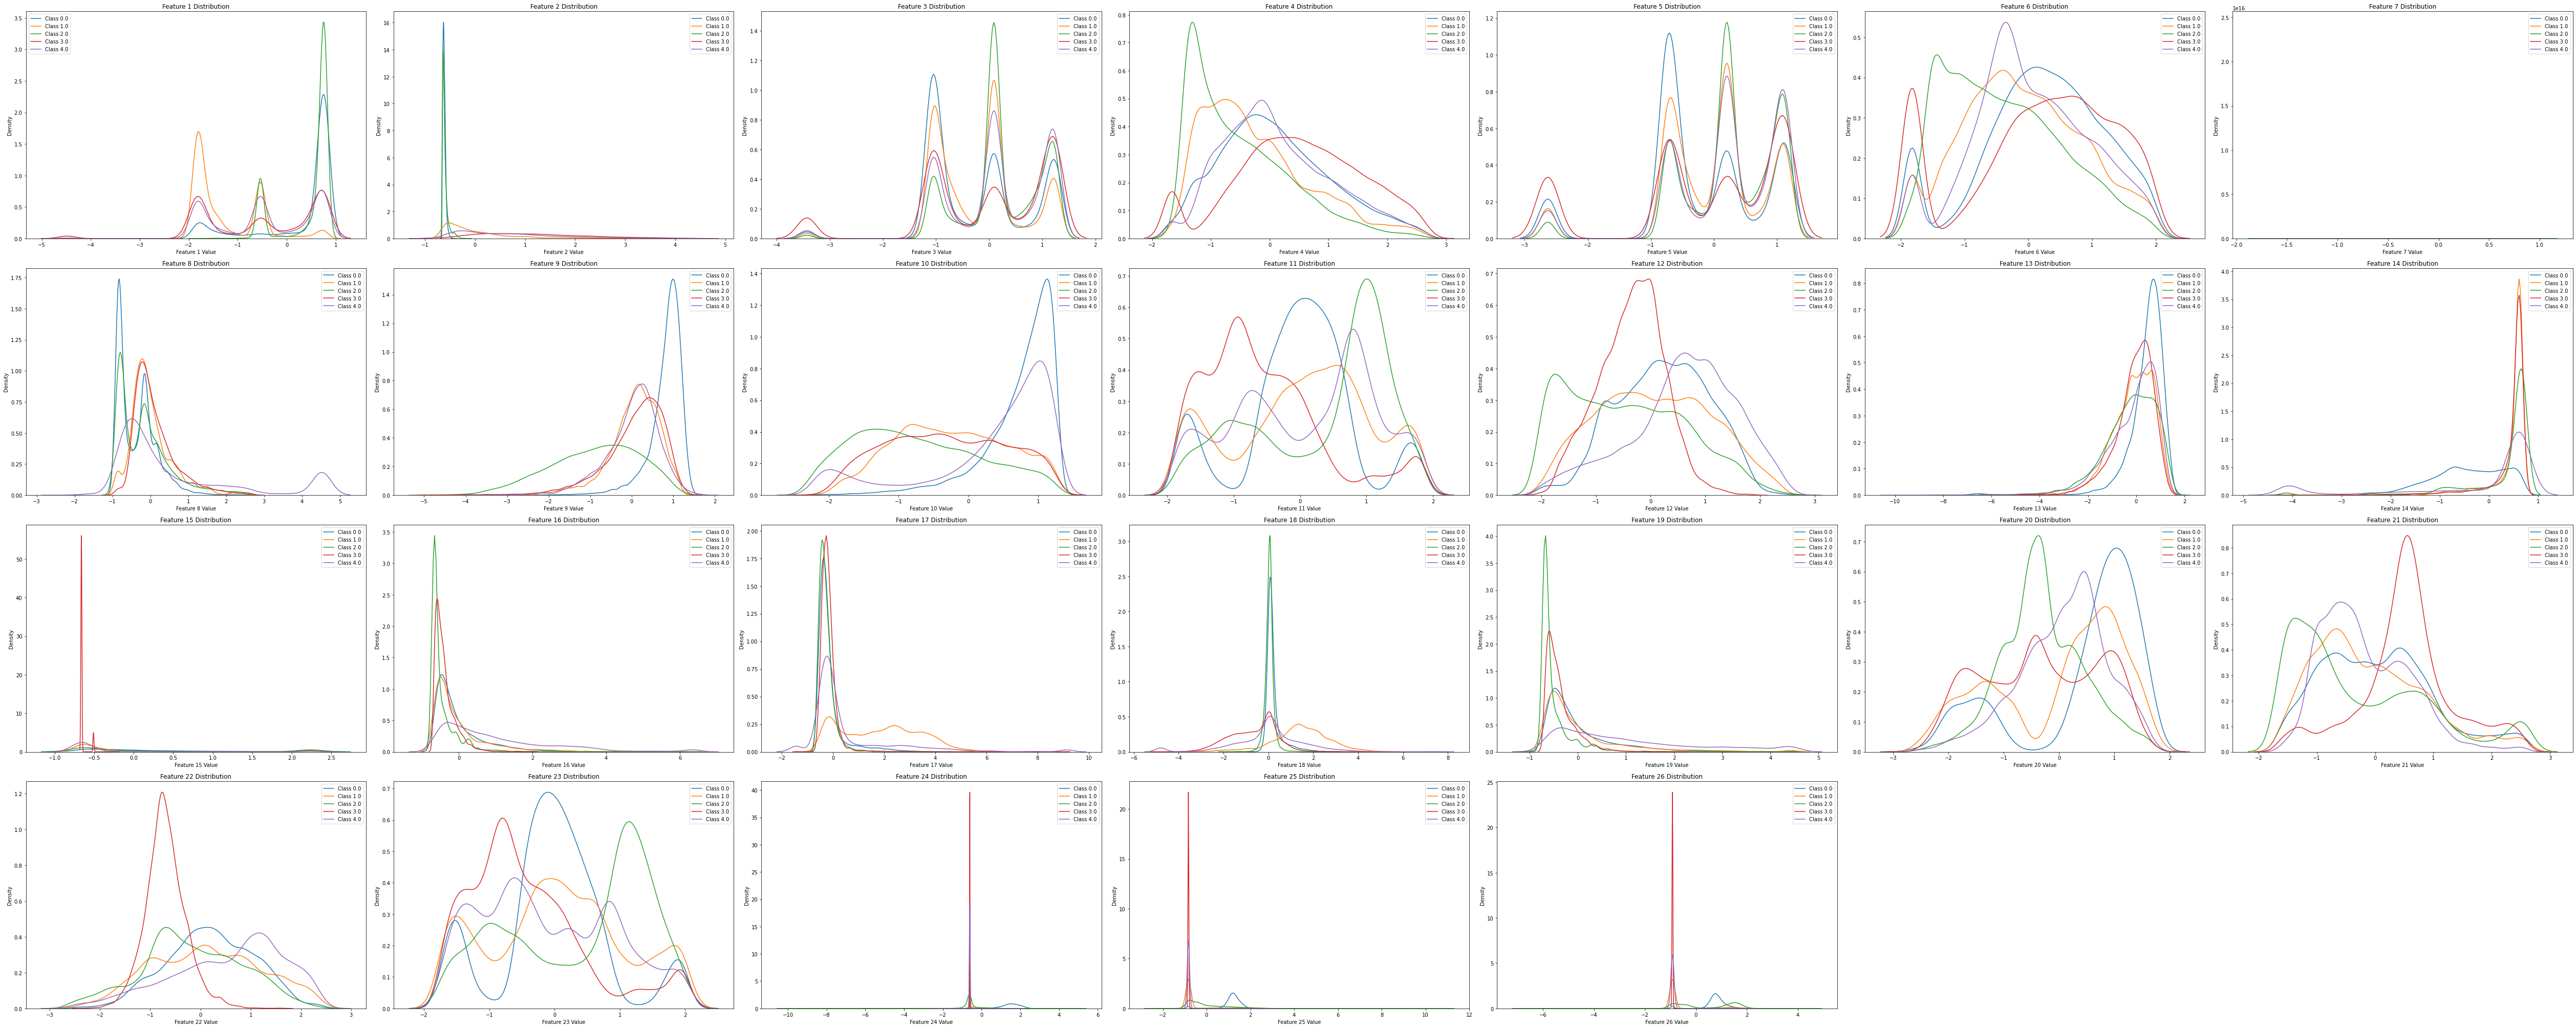

In [23]:
import seaborn as sns

# Get unique class labels
unique_classes = np.unique(labels_train)

# Number of columns for subplots
num_columns = 7

# Calculate the number of rows needed based on the number of features
num_rows = (num_features + num_columns - 1) // num_columns

# Width of each subplot (adjust this value)
subplot_width = 10  # Change this value to adjust the width of subplots

# Create subplots for each feature's distribution
plt.figure(figsize=(subplot_width * num_columns, 7 * num_rows))

for feature_idx in range(num_features):
    plt.subplot(num_rows, num_columns, feature_idx + 1)
    
    for class_label in unique_classes:
        # Filter samples with the current class label and feature index
        class_indices = [idx for idx, label in enumerate(labels_train) if label == class_label]
        feature_values = [features_train[idx][feature_idx] for idx in class_indices]
        
        sns.kdeplot(feature_values, label=f'Class {class_label}')
    
    plt.title(f'Feature {feature_idx + 1} Distribution')
    plt.xlabel(f'Feature {feature_idx + 1} Value')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()

# Save the figure with higher resolution
plt.savefig('feature_distributions.png', dpi=300)

plt.show()


dict_keys(['Train', 'Validation', 'Test'])
Train dataset
size:  72710
image shape:  (3, 63, 63)
feature shape:  26
label example:  2

Validation dataset
Example
size:  500
image shape:  (3, 63, 63)
feature shape:  26
label example:  0


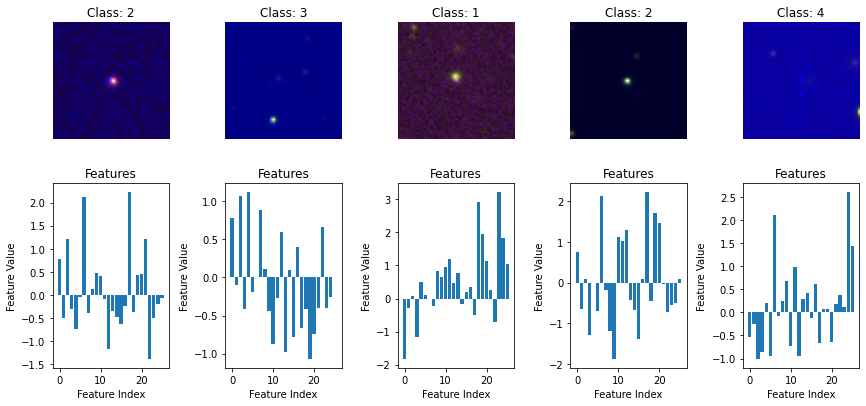

In [8]:
save_dir = 'C:/Users/nfier/Documents/Magister/cursos/EL7006 Redes Neuronales y Teoría de Información para el Aprendizaje/proyecto/'
#Carga de datos
with open(save_dir + "td_ztf_stamp_17_06_20.pkl", "rb") as f:
    data = pk.load(f)

print(data.keys())
#Separacion de los datos
Train_dict = data['Train']
Validation_dict = data['Validation']
train_images = Train_dict['images']
validation_images = Validation_dict['images']
labels_train = Train_dict['labels']
labels_val = Validation_dict['labels']
features_train = Train_dict['features']
features_val = Validation_dict['features']


#Carga del dataset
train_dataset = StampDataset(np.transpose(train_images,[0,3,1,2]),features_train,labels_train)
val_dataset = StampDataset(np.transpose(validation_images,[0,3,1,2]),features_val,labels_val)

#analize the dataset
print('Train dataset')
print('size: ',len(train_dataset))
print('image shape: ',train_dataset[0][0].shape)
print('feature shape: ',len(train_dataset[0][1]))
print('label example: ',train_dataset[0][2])
print('\nValidation dataset')
print('Example')
print('size: ',len(val_dataset))
print('image shape: ',val_dataset[0][0].shape)
print('feature shape: ',len(val_dataset[0][1]))
print('label example: ',val_dataset[0][2])

# Visualize some samples from the training dataset
num_samples_to_visualize = 5
random_sample_indices = np.random.choice(num_train_samples, num_samples_to_visualize, replace=False)

plt.figure(figsize=(12, 6))
for i, idx in enumerate(random_sample_indices):
    image, features, label = train_dataset[idx]
    plt.subplot(2, num_samples_to_visualize, i + 1)
    plt.imshow(image.transpose(1, 2, 0))  # Assuming channels are the last dimension
    plt.title(f'Class: {label}')
    plt.axis('off')

    plt.subplot(2, num_samples_to_visualize, num_samples_to_visualize + i + 1)
    plt.bar(range(num_features), features)
    plt.title('Features')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Value')

plt.tight_layout()
plt.show()

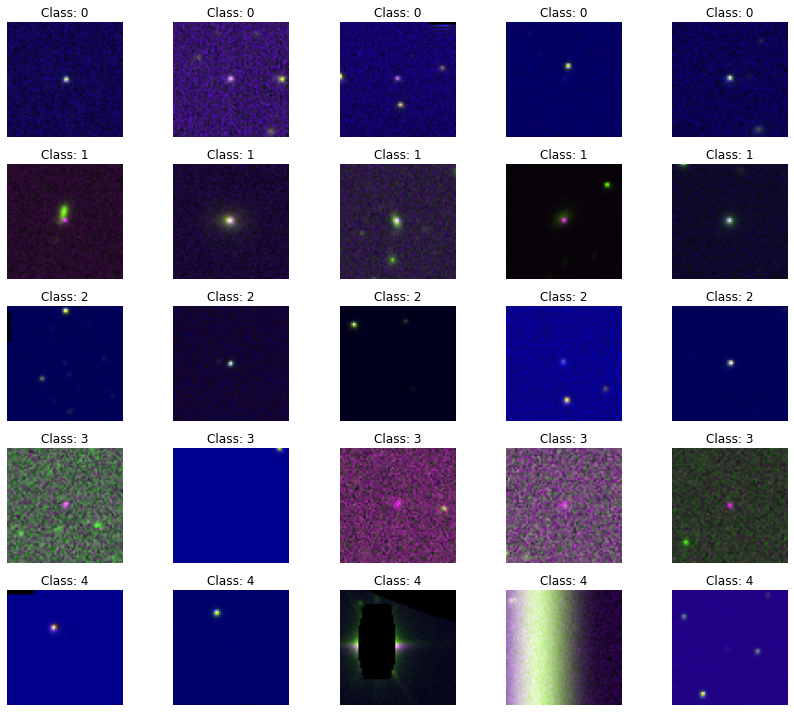

In [9]:
np.random.seed(1234)

# Get unique class labels
unique_classes = np.unique(labels_train)

# Number of samples to visualize for each class
num_samples_per_class = 5

plt.figure(figsize=(12, 2 * len(unique_classes)))



for class_label in unique_classes:
    # Filter samples with the current class label
    class_indices = [idx for idx, label in enumerate(labels_train) if label == class_label]
    
    # Randomly select samples for the current class
    random_sample_indices = np.random.choice(class_indices, num_samples_per_class, replace=False)
    
    for i, idx in enumerate(random_sample_indices):
        image, features, label = train_dataset[idx]
        plt.subplot(len(unique_classes), num_samples_per_class, (int(class_label) * num_samples_per_class) + i + 1)
        plt.imshow(image.transpose(1, 2, 0))  # Assuming channels are the last dimension
        plt.title(f'Class: {label}')
        plt.axis('off')

        if i == 0:
            plt.ylabel(f'Class {class_label}')
        
        if i == num_samples_per_class - 1:
            plt.xlabel('Samples')

plt.tight_layout()
plt.show()
